## 第三讲 算法设计技术

设计算法，有很多思想，很多技术。我们从哪里开始呢？就从最简单的，循环，开始吧。

请问，写程序时，你是怎们设计循环呢？或者从来没想过这个问题，似乎，想一想，循环就会从脑子里冒出来。写个雏形，在调试调试，就可以解决问题了。

这是大家常用的套路。让我们看看循环设计，有没有方法可依靠。

### 契约式设计

为了理解循环设计技术，我们从[契约式设计](https://www.zhihu.com/question/19864652)，[Design by contract](https://en.wikipedia.org/wiki/Design_by_contract)。这种设计里面的三个概念，前置条件，后置条件和不变式，对我们要介绍的循环设计，至关重要。

Design by contract (DbC), also known as contract programming, programming by contract and design-by-contract programming, is an approach for designing software.

It prescribes that software designers should define formal, precise and verifiable interface specifications for software components, which extend the ordinary definition of abstract data types with preconditions, postconditions and invariants. These specifications are referred to as "contracts", in accordance with a conceptual metaphor with the conditions and obligations of business contracts.

Preconditions and postconditions belong to Contract-based-programming.

A *precondition* is a predicate that should hold upon entry into a function. It expresses a function's expectation on its arguments and/or the state of objects that may be used by the function.

A *postcondition* is a predicate that should hold upon exit from a function. It expresses the conditions that a function should ensure for the return value and/or the state of objects that may be used by the function.

前置条件是在每个操作（方法，或者函数）开始前，保持为真的条件表达式（或称谓词），后置条件是在每个操作执行之后，保持为真的条件表达式（或谓词）。不变式，是操作过程中，保持为真的条件表达式（或谓词）。

契约式设计的初衷是为了检验软件([software verification](https://en.wikipedia.org/wiki/Software_verification))，其目的之一是保证[程序正确性质](https://zhuanlan.zhihu.com/p/259500451)。

我们课程目前关心，如何设计出正确的循环，实现算法。

### 循环不变式

#### 参考阅读
- 关于循环不变量的综述文章：C. A. Furia, B. Meyer和S. Velder, Loop invariants: Analysis, classification, and examples, ACM Comput. Surv., 卷 46, 期 3, 页 1–51, 1月 2014, doi: 10.1145/2506375.
- [如何正确的理解循环不变式?](https://www.zhihu.com/question/26700198)
- [理解循环不变量](https://segmentfault.com/a/1190000041715631)
- [Loop Invariants in Python](https://softwareengineering.stackexchange.com/questions/183815/loop-invariants-in-python)
- [What is a loop invariant?](https://stackoverflow.com/questions/3221577/what-is-a-loop-invariant)
- [Loop Invariants](https://www.cs.miami.edu/home/burt/learning/Math120.1/Notes/LoopInvar.html)
- [Loop Invariants](https://www.cs.scranton.edu/~mccloske/courses/cmps144/invariants_lec.html)
- [Loops Invariants, Correctness, and Program Derivation](https://archives.evergreen.edu/webpages/curricular/2001-2002/dsa01/loops.html)
- [*Loop Invariant Proofs: General Strategies for finding loop invariants*](https://www.win.tue.nl/~kbuchin/teaching/JBP030/notebooks/loop-invariants.html)
- [Loop invariants can give you coding superpowers](https://yourbasic.org/algorithms/loop-invariants-explained/)

设计循环，要抓住设计循环不变式，作为核心。

> 循环不变式让我感兴趣的地方在于，反直觉。习惯性思考，循环正式靠变化，反复多轮复用一段代码，完成任务。而在这剧烈的变化中，竟然有不变的东西，而且，这不变的东西才是循环的真正要义所在。变化中蕴含着恒定的东西，仅仅这个想法就有点让人着迷。

检验软件要以循环不变式全面检验每个循环，以验证循环正确性。而且，理解循环不变式，有助于洞见使用循环的算法的本质。

实践中，找出有效、有用的循环不变式依然不容易。幸运的是，许多循环不变式直观地展示出某些共性。理解这些循环不变式的规律，有助于理解和检验大量程序。

下面就要从不同的基础算法中，系统地识别、检验、分类循环不变式。要旨，就是分析规律，决定如何从后置条件中得到循环不变式。并给循环不变式进行分类。

####  缘起

确保程序正确，并不容易。Tony Hoare的论文启发了大量的研究。如model checking(Clark 1999)，（Cousot 1977）,他们都旨在找到特定错误。这些方法的优势在于仅分析程序，而不靠注释。对于全面验证程序正确的性质，标准方法依然是Floyd-Hoare-Dijkstra式的公理化语义方法。这种方法，须在程序中，多写断言（Assertions）式的注释。特别地，针对循环，每个循环必须有循环不变式，以表达循环的语义。

设计循环时，找到适用的循环不变式是正确性检验中关键且巧妙的一步。尽管有程序员认为，指明循环不变式是做正式检验软件的人的事，但这个概念却十分有用。在非正式的检验，即开发中，也十分有用。循环不变式表达了循环最根本的信息，表明了循环欲达何种目的，以及如何达到这个目的。夸张点说，不知道循环不变式，就没有真正理解循环。

####  循环不变式基础

循环不变式的公理化方法源于(Floyd, 1967)，(Hoare,1969)。在他们的方法中，循环不变式不仅是执行循环中不变（为真）的某种性质，更是一种“演绎不变式”。（我的理解：虽然经过循环若干轮递推执行，但循环不变式在递推/演绎中，不改变真值）。当然，他们方法中的不变式，不只有循环不变式，例如，还有类不变式等。我们目前只关心循环不变式。

循环不变式的定义，可以用Eiffel语法表达。大家不必考虑那个语言，把这个表达理解为伪代码即可。

`
from
  Init
invariant
  Inv
until
  Exit
variant
  Var
loop
  Body
end
`

这里，Init和Body是顺序复合语句，允许为空，一般Body不空。Exit和Inv是布尔表达式，即程序状态上的谓词。这个循环的含义是：

1. Execute Init
2. Then, if Exit == True, do nothing; if Exit == False, execute Body, and repeat 2.

或可说，执行循环体，这个循环体包含Init, 执行0次或多次Body，当Exit为真时，退出循环。那Inv, Var相当于什么呢？

循环不变式Inv，一般在非形式语义（指编程）中，不被提及。这也是为什么我们对这个概念陌生。但它实实在在用处是验证循环递推是否正确。当满足下列条件时，Inv是正确的循环不变式:

- 每次启动执行循环，循环状态改变之初，执行Init，产生一个状态。该状态下（初始化后），Inv holds，循环不变式值为真，即满足循环不变式。
- 每次执行循环，即执行Body循环体。初始时，Inv满足（为真），Exit不满足（为假）。执行循环体后，产生一个状态，Inv依然满足。

符合上两条的循环，当执行循环结束时，产生的状态，Inv，Exit均满足。这种结束的状态是循环语义的结果，即循环要达到的目的。循环的语义，将循环定义为，首先，执行Init，再执行0或多轮Body，每轮执行状态中Exit都不满足。如果执行Init，保证Inv满足，每轮执行Body时，保证Inv满足，那么Init后，任意轮Body中，都保证Inv满足。这就是循环不变式的含义，在整个循环中，循环不变式的值始终为真。

循环不变式形式表示如下：

$$\frac{\left\{P\right\}Init\left\{Inv\right\}, \left\{Inv \land \lnot Exit\right\}Body\left\{Inv\right\}}{\left\{P\right\}from - Init - until - Exit - loop - Body - end\left\{Inv \land Exit\right\}}$$

这个称为偏序正确法则partial correctness，适用于能结束的循环（不能用于无限循环，算法须保证有输出、有穷性。无限循环不符合算法性质）。偏序正确法则，上面是假设，下面是结论。

它的假设解释如下：

- $\left\{P\right\}Init\left\{Inv\right\}$，即初始化保证循环不变式为真，称为，初始化性质initialization property
- $\left\{Inv \land \lnot Exit\right\}Body\left\{Inv\right\}$，即执行循环体保证循环不变式为真，称为，递推（演绎）性质consecution(inductiveness) property

以上定义，保证循环不变式在能结束的循环中，确实保持不变（恒为真）。

#### 构造视角看循环不变式

从构造的视角看循环不变式。构造（编写）程序，目的是使程序达到*某种*期望的状态。程序的状态一般通过变量值来描述。这种期望的状态，即是后置条件。这样看，编程就是解决问题，不同的控制结构，即是解决问题的技术（Dijkstra 1976, Meyer 1980...）。循环时控制结构之一，循环技术，通过*连续近似*解决问题。这个观念，如图所示。

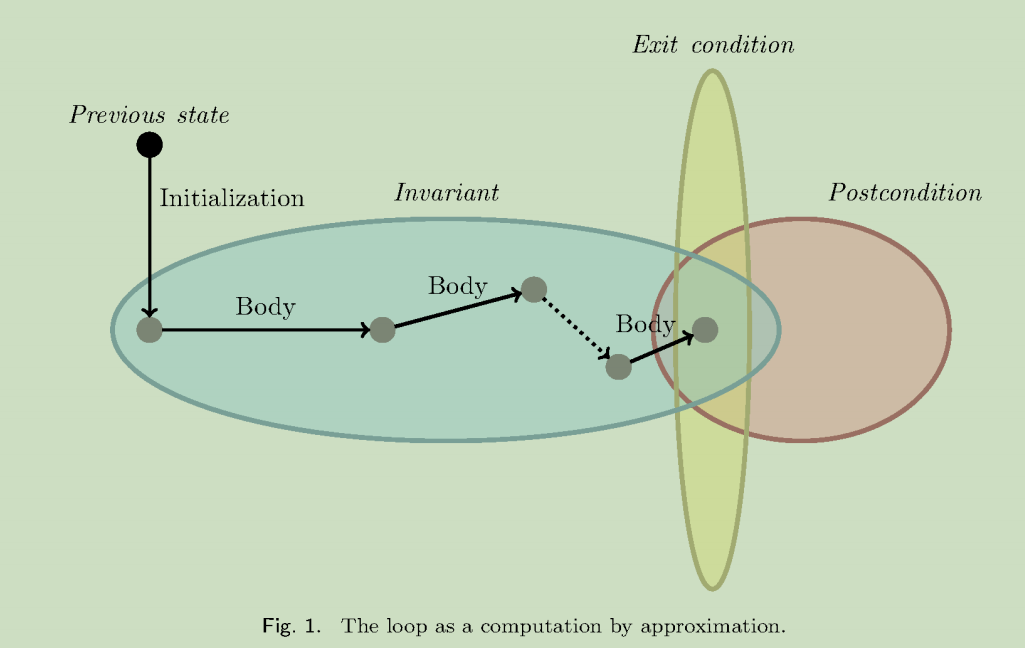

这种看待循环的构造视角，思路如下：

1. 推广/概括/泛化后置条件，即解决方案应有的性质，至更宽的条件，即得到循环不变式
2. 推广的结果，后置条件可定义为循环不变量与退出条件与运算的结果
3. 找到一条途径，使程序从初始状态到满足循环不变量的状态。这条途径就是初始化操作
4. 找到一系列途径，既满足循环不变量，又能到达新状态，新状态下依然满足循环不变量，但在合适的意义下，每个状态都距离结束条件更近（连续近似）。这一系列途径就是循环体。

上述思路凸显了循环不变式的本质：**循环不变式是推广（扩大范围）的后置条件**，在特定的情况下，即当退出条件为真时，循环不变式回缩为后置条件。这样就得到了执行程序欲得的结果。

此种视角下的循环不变式，是一种手段，借助这种手段，可以推广循环计算欲达到的目标（扩大目标范围，循环体这个更大的范围内运算/寻找结果，当到特定情况，退出条件为真时，缩小了目标，找到结果。）从这个角度理解，也就解释了为什么循环不变式是循环如此重要的性质。甚至可以说，理解循环就是要理解它的不变式。尽管并非每个程序员写循环时都会明确知晓循环不变式。但他一定知晓后置条件。他仅仅没从推广角度考虑后置条件。

我们学习了循环不变式，在阅读理解循环时，编写循环时，应有意考虑循环的循环不变式。

那篇文章提供了从后置条件得到循环不变式的一般策略。

#### 一个例子

让我们通过实际例子，看看循环不变式什么样子，它有什么能耐。

##### 求最大公约数GCD

求最大公约数的后置条件，程序欲达到的结果就是$$Result = gcd(a, b)$$
如何推广这个后置条件呢？推广的方法是替换后置条件为：
$$Result = x \land gcd(Result, x) = gcd(a,b) --- (1)$$ 
这里引入了一个变量x,利用了最大公约数的数学性质
$$gcd(x, x) = x  --- (2)$$

(1)中的第二个子项，推广的后置条件，将作为循环不变式。第一项，将作为退出条件。为得到循环体，利用最大公约数的另一个数学性质
$$ for x>y ， gcd(x, y) = gcd(x-y, y) --- （3）$$
这是更相减损术中的结论。

由此，得到欧几里得算法的形式描述如下图

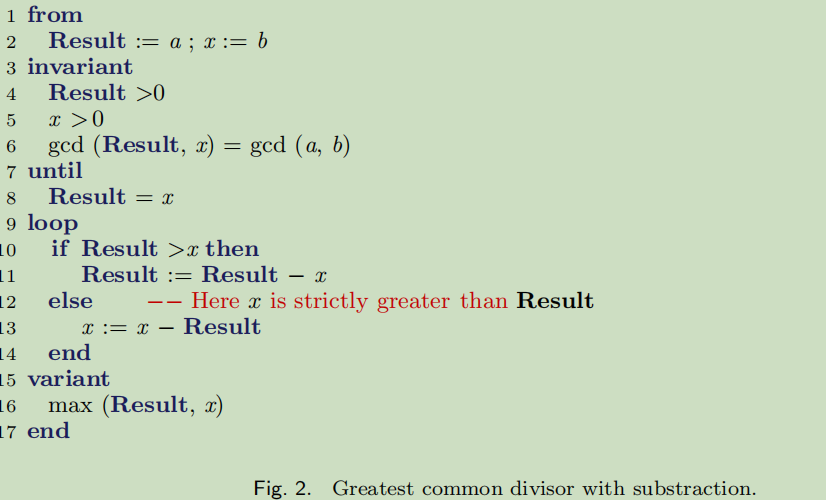

一些术语说明
- invarant不变式中最后一个子项$gcd(Result, x)=gcd(a,b)$称为*核心不变式essential invariant*，代表推广（扩大范围、弱化、松弛）后的后置条件。前两个子项称为*约束不变式bounding invariant*，表明变量变化的状态的约束范围内。核心不变式，必须定义。
- 核心不变式是保持式不变式conservation invariant，表示特定表达式的真值不变，与初始值相同。
- 如何找到这种保持式不变式呢？一般的策略是拆分/解耦。通过将后置条件中的某变量的性质，如Result，替换为循环不变式中的两个变量Result, x的性质。
$$Result = gcd(a, b) \Longrightarrow gcd(Resutl, x) = gcd(a, b)$$

如何证明该循环正确？
- gcd(x, x) = x ，初始化正确，即（2）
- gcd(x, y) = gcd(x-y, y)，递推规则正确，即（3）

### 其他类型的不变式

不变式或不变量十分常见，如光速，时间等等。变化中蕴含恒定，这个观念也十分深刻。

具体到计算机科学领域，面向对象编程中，有类不变式。它表示类具有一种性质。

- 创建实例后，实例立即拥有上述性质（类不变式）
- 每个类的动作/方法/操作都保持上述性质

由此，当外部环境可以调用此实例，此实例将一直保持此性质，即满足类不变式。

在实例的生命周期内，例如会调用若干次x.f。若把实例的生命周期比拟为循环，则前述两条类不变式的性质，特别像循环不变式中的Init和Body。那么类不变式的形式语义可以写为：

`
from
  create x.make or x := new C()  -- constructor
invariant
  CI  -- The class invariant
until
  "x is no longer needed"  -- deconstructor
loop
  x.some_feature_of_the_class
end
`

还有其他类型的不变式，如Lamport_style不变式（Lamport 1977）用于分析并发程序。和其他不变式一样Lamport不变式是程序状态的谓词，推广的后置条件。不同处在于“状态”的定义。并发程序的状态，处程序变量值外，还包括程序执行的并发点，及并发点引起的所有并发程序。

这两个仅作为了解，不继续讲了。

### 用领域理论domain theory表达不变式

表示不变式应与常用的前置后置条件的规约相容，因为不变式是推广的后置条件。不变式是断言的特例，是程序状态的谓词。

例如： assert x>0 是断言，是程序状态的谓词（及程序状态的函数）。它取所有计算机状态（所有变量可能取值集合）中，满足x为正的那些状态。或可理解为，此断言从总集中分出子集，即从全集状态空间中，分出满足断言条件的子集。

一个函数的后置条件常是两个状态的谓词，连接新值与原值，如counter = old counter + 1。尽管不变式与后置条件直接关联。人们仍不用这种符号，而将不变式视为一个状态的函数。

编程语言自带表达状态谓词的机制，就是我们十分熟悉的布尔表达式。因此，后置条件可以用语言自带的断言表达式，亦可扩展使用注释标记符号，如old counter之类。

在如何表达断言上，有两种选项：

- 允许断言、后置条件、循环不变式使用合适的机制，即某些定义好的函数和谓词，来表达语义。这指使用语言定义好的函数，以领域知识覆盖特定的知识。此法称为领域理论。比如使用sum、count，它们都不是原子语义，都是定义好的。这里面的领域知识及数学知识。我们使用sum直接认为就是求和，而不必在细致定义如何求和。
- 不允许上一条领域知识，要求断言用断言语句表达。此法称为原子断言。

前例中欧几里得算法使用了领域理论，因为它在不变式子项中使用了gcd。如将$Result = gcd(a, b)$推广为$gcd(Result,x) = gcd(a, b)$。人们默认，知道gcd代表的含义。

若不用领域知识，则需用最大公约数的基本定义，在原子断言风格下，后置条件将写为:

`
Result > 0
a \mod Result = 0
b \mod Result = 0
`

$\forall i \in \mathbb{N}: (a \mod i = 0) \land (b \mod i=0) \Longrightarrow i < Result$

上述断言说明，Result是所有i中最大的那个数，这些数满足程序的性质（公约数性质）。因此，Result是最大公约数。

完整的表达须再写几行，因为gcd两边都要定义。

领域理论就是使用应用程序接口，定义接口的函数具有复合语义。该复合语义由其内部定义的原子、复合语义而得。这些内部语义对外隐藏了细节，做了模块化、信息隐藏、抽象。

可以看出，即使在如此简单的例子中，原子断言的局限也十分明显：它要求每次都使用最基本的逻辑构件。这十分不利于扩展构造大型复杂的表达式。

再看一个例子，求数组最大值。

原子断言风格，后置条件写为：
$$\forall k \in \mathbb{Z} : a.lower \leq  \leq a.upper \Longrightarrow a[k] \leq Result$$
$$\exists k \in \mathbb{Z} : a.lower \leq k \leq a.upper \land a[k]=Result$$

那个值等于Result的元素，即数组的最大值元素。这个性质就是数组最大值的定义。

若用领域理论，max表示最大值，后置条件变得简单多了：$$Result = max(a)$$

若根据这些后置条件，推广出循环不变式，编写程序，尽管不变式概念简单，但原子断言式却显得十分复杂，而用领域理论表达不变式，一下子抓住了算法的本质，简洁明了。可以说，使用领域理论表达的不变式，好的不变式，让人一下子就理解了循环。

那原子断言风格还有存在的必要吗？

有的，原子断言风格，更适于自动推理，就好像人更容易理解高级程序设计语言，而机器更容易理解机器语言一样。


领域理论表明在开发算法前，应开发合适的基础领域模型。开发领域模型的方法，先定义合适的概念，如整数之于GCD。继而建立有关的定理，如$x>y \Longrightarrow gcd(x,y) = gcd(x-y, y)$。这些概念和定理是为领域应用开发的，适用于该领域，不必每写一个程序就重新开发一次。只要针对这个领域，模型就适用。这就是数学的方法，也是数学的应用。

领域理论使用了数学的标准抽象机制，十分方便。不利的地方，对于嵌入语言的断言，某些函数必来源于函数库。则库中函数也必须满足特定约束，应该不引入其他函数，应为“纯”函数。而实际上，函数都是层层调用的。这个不利处，对实际应用有影响，对概念性讨论没有影响。

我们不在就那个表达简洁，那个表达更有利于自动推理展开讨论。我们回到我们的课程，在特定抽象层次下，通过循环不变式理解算法的本质。

### 循环不变式的类别

循环不变式及其子项，依两个维度分类。
- 依的后置条件中的作用，分为核心不变式和约束不变式，它们表达了不变式的性质
- 依从后置条件中得到不变式的转换技术，分为若干，如拆分/解耦uncoupling和松弛常量constant relaxation。

#### 依作用分类
循环体递推必须在收敛区域内执行，该区域由后置条件的推广形式予以定义，具体而言，就是由约束不变式定义。而推广形式本身就是核心不变式。

例如：gcd的约束不变式$Result > 0, x > 0$，核心不变式$gcd(Result, x) = gcd(a, b)$，如果Result = x，则到达后置条件。

缺了约束条件，则无法准确定义核心不变式，必须用约束不变式约束核心不变式，这样的循环不变式才有意义。

#### 依转换技术分类

核心不变式是后置条件的变形/弱化/松弛。常用变换技术如下。

1. 松弛常量

将常量n或后置条件中的某常量，替换为变量i，使用i=n作为退出条件，或退出条件的子项。

求数组最大算法用此技术，其常量就是数组上界。不变式推广后置条件。初始化状态为“Result是数组到a.lower的最大值”，a.lower是常量。对非空数组，初始化是成立的，此时i=a.lower数组中只有一个值a[i]，自然是最大值。将a.lower推广为递增i，扩展了a.lower的范围，及所谓将这个常量松弛，替换为变量i，则推广后的后置条件为“Result是数组到i的最大值”。当i=a.upper时（退出条件），即求出数组a[a.lower, a.upper]的最大值。

2. 拆分

将变量Result替换为两个变量Result, x，以他们相等为退出条件，或退出条件子项。GCD用的就是这种转换技术。

3. 丢弃子项 Term dropping
丢弃后置条件中的某个子项，直接弱化了后置条件，相当于推广了后置条件。

4. 返旧值Aging
将变量或表达式替换为上轮循环时的值。

5. 反向推理Backward reasoning
以反向替代得到断言，退出循环不变式

在后面课程中，我们会根据具体算法，介绍循环不变式在算法中的用途。